In [1]:
#IMPORTO LIBRERIAS
import pandas as pd
import numpy as np
import datetime
import re
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTO ENTRONO DE TRABAJO
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
#DEFINO RUTA DE TRABAJO
root_path = "/content/gdrive/MyDrive/UTN/5° año/Ciencia de datos/TP Cienca de datos/"
#root_path = "/content/gdrive/drive/folders/1oJJYAqiOnK4f3m5Ym4Lll4hEgd_qaMnW/"

plot_path = root_path + "figures/"

# Datasets recorridos 2020 y 2021

In [4]:
#IMPORTO EL DATASET 2020
recorridos_2020 = pd.read_csv(root_path+"recorridos-realizados-2020.csv")
recorridos_2020.head()

,duracion_recorrido,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,periodo
0,882,116,2020-12-31 23:54:22,116 - HOSPITAL ALEMÁN,2021-01-01 00:09:04,214.0,142 - Armenia y Gorriti,666202,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
1,894,116,2020-12-29 12:39:18,116 - HOSPITAL ALEMÁN,2020-12-29 12:54:12,214.0,142 - Armenia y Gorriti,332689,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
2,1361,116,2020-12-21 21:21:38,116 - HOSPITAL ALEMÁN,2020-12-21 21:44:19,214.0,142 - Armenia y Gorriti,57949,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
3,1010,116,2020-12-20 21:58:19,116 - HOSPITAL ALEMÁN,2020-12-20 22:15:09,214.0,142 - Armenia y Gorriti,454846,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
4,1490,116,2020-12-20 13:32:53,116 - HOSPITAL ALEMÁN,2020-12-20 13:57:43,214.0,142 - Armenia y Gorriti,690975,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#IMPORTO EL DATASET 2021
recorridos_2021 = pd.read_csv(root_path+"recorridos-realizados-2021.csv")
recorridos_2021.head()

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,MEMBER,ICONIC,CODE
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,MEMBER,ICONIC,CODE
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,MEMBER,ICONIC,CODE
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,MEMBER,ICONIC,CODE
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,MEMBER,ICONIC,CODE


In [7]:
#ESTANDARIZO LOS NOMBRES DE LAS ESTACIONES PARA 2020
recorridos_2020["nombre_estacion_origen"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_origen"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_origen"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_origen"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

recorridos_2020["nombre_estacion_destino"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_destino"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_destino"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
recorridos_2020["nombre_estacion_destino"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

In [8]:
#ESTANDARIZO LOS NOMBRES DE LAS ESTACIONES PARA 2021
recorridos_2021["Nombre de estación de inicio"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de inicio"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de inicio"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de inicio"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

recorridos_2021["Nombre de estación de fin de viaje"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de fin de viaje"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de fin de viaje"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
recorridos_2021["Nombre de estación de fin de viaje"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

In [9]:
#PONGO TODOS LOS NOMBRES DE ESTACIONES EN MAYÚSCULAS 
recorridos_2020["nombre_estacion_origen"] = recorridos_2020["nombre_estacion_origen"].str.upper()
recorridos_2020["nombre_estacion_destino"] = recorridos_2020["nombre_estacion_destino"].str.upper()

recorridos_2021["Nombre de estación de inicio"] = recorridos_2021["Nombre de estación de inicio"].str.upper()
recorridos_2021["Nombre de estación de fin de viaje"] = recorridos_2021["Nombre de estación de fin de viaje"].str.upper()

In [10]:
#ELIMINO ESPACIOS ANTES Y DESPUES DEL NOMBRE DE ESTACIÓN
recorridos_2020["nombre_estacion_origen"] = recorridos_2020["nombre_estacion_origen"].str.strip()
recorridos_2020["nombre_estacion_destino"] = recorridos_2020["nombre_estacion_destino"].str.strip()

recorridos_2021["Nombre de estación de inicio"] = recorridos_2021["Nombre de estación de inicio"].str.strip()
recorridos_2021["Nombre de estación de fin de viaje"] = recorridos_2021["Nombre de estación de fin de viaje"].str.strip()

In [11]:
#BORRO COLUMNAS INNECESARIAS
recorridos_2020 = recorridos_2020.drop(["id_estacion_origen", "id_estacion_destino", "direccion_estacion_origen", "long_estacion_origen", "lat_estacion_origen", "direccion_estacion_destino", "long_estacion_destino", "lat_estacion_destino", "periodo"], axis=1)
recorridos_2021 = recorridos_2021.drop(["ID", "Id de estación de inicio", "Id de estación de fin de viaje", "Tipo de ciclista", "Modelo de bicicleta", "Origen de viaje", "Estado cerrado"], axis=1)

In [12]:
recorridos_2020.head()

,duracion_recorrido,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,nombre_estacion_destino,id_usuario
0,882,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,666202
1,894,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,332689
2,1361,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,57949
3,1010,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,454846
4,1490,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,690975


In [13]:
recorridos_2021.head()

,Duración,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Nombre de estación de fin de viaje,ID de ciclista
0,437,2021-06-02 16:14:35,HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,PLAZA LIBERTAD,119795
1,406,2021-06-02 16:11:01,DONATO ALVAREZ,2021-06-02 16:17:47,PLAZA SAENZ PEÑA,348428
2,299,2021-06-02 16:10:08,TAMBORINI,2021-06-02 16:15:07,COGHLAN,690073
3,400,2021-06-02 16:09:34,HUMBERTO 1°,2021-06-02 16:16:14,CONSTITUCIÓN,713938
4,591,2021-06-02 16:09:32,VELASCO,2021-06-02 16:19:23,VILLARROEL,35926


In [14]:
#RENOMBRO COLUMNAS
recorridos_2020 = recorridos_2020.rename(columns={"duracion_recorrido": "Duración", "fecha_origen_recorrido": "Fecha de inicio", 'nombre_estacion_origen': 'Estación de inicio', "fecha_destino_recorrido": "Fecha de fin", "nombre_estacion_destino": "Estación de fin", "id_usuario": "ID ciclista"})
recorridos_2021 = recorridos_2021.rename(columns={'Nombre de estación de inicio': 'Estación de inicio', "Nombre de estación de fin de viaje": "Estación de fin", "ID de ciclista": "ID ciclista"})

In [15]:
print(recorridos_2020.columns)
print(recorridos_2021.columns)

Index(['Duración', 'Fecha de inicio', 'Estación de inicio', 'Fecha de fin',
       'Estación de fin', 'ID ciclista'],
      dtype='object')
Index(['Duración', 'Fecha de inicio', 'Estación de inicio', 'Fecha de fin',
       'Estación de fin', 'ID ciclista'],
      dtype='object')


In [16]:
print(len(recorridos_2020["Estación de inicio"].unique()))
print(len(recorridos_2021["Estación de inicio"].unique()))

201
233


In [17]:
print(np.shape(recorridos_2020))
print(np.shape(recorridos_2021))

(2002945, 6)
(1328726, 6)


In [18]:
#CONCATENO LOS DATASETS
recorridos_2020_2021 = pd.concat([recorridos_2020, recorridos_2021], axis=0)

In [19]:
#RESETEO INDICES
recorridos_2020_2021.reset_index(inplace=True, drop=True)

In [20]:
print(np.shape(recorridos_2020_2021))

(3331671, 6)


In [21]:
#PASO COLUMNA DURACION A MINUTOS Y REDONDEO A 1 DECIMAL
recorridos_2020_2021["Duración"] = recorridos_2020_2021["Duración"]/60
recorridos_2020_2021["Duración"] = recorridos_2020_2021["Duración"].round(1)

In [22]:
recorridos_2020_2021.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,ID ciclista
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,666202
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,332689
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,57949
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,454846
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,690975


In [23]:
#CHEQUEO VALORES NULOS
recorridos_2020_2021.isnull().sum()

Duración              0
Fecha de inicio       0
Estación de inicio    0
Fecha de fin          0
Estación de fin       3
ID ciclista           0
dtype: int64

In [24]:
#ELIMINO NANS YA QUE HAY SOLAMENTE 3
recorridos_2020_2021 = recorridos_2020_2021.dropna(axis = 0)

In [25]:
np.shape(recorridos_2020_2021)

(3331668, 6)

In [26]:
#PASO A DATE TIME Y OBTENGO COLUMNA CON MES, AÑO Y HORA
recorridos_2020_2021['Fecha de inicio']= pd.to_datetime(recorridos_2020_2021['Fecha de inicio'])
recorridos_2020_2021["Año"] = recorridos_2020_2021['Fecha de inicio'].dt.year
recorridos_2020_2021["Mes"] = recorridos_2020_2021['Fecha de inicio'].dt.month
recorridos_2020_2021["Día del mes"] = recorridos_2020_2021['Fecha de inicio'].dt.day
recorridos_2020_2021["Día de la semana"] = recorridos_2020_2021['Fecha de inicio'].dt.dayofweek
recorridos_2020_2021["Hora"] = recorridos_2020_2021['Fecha de inicio'].dt.hour

In [27]:
#OBTENGO COLUMA RECORRIDO, CON ESTACION DE INICIO Y FIN
recorridos_2020_2021["Recorrido"] = recorridos_2020_2021['Estación de inicio'] + " " + "-" + " " + recorridos_2020_2021['Estación de fin']

In [28]:
recorridos_2020_2021.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,ID ciclista,Año,Mes,Día del mes,Día de la semana,Hora,Recorrido
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,666202,2020,12,31,3,23,HOSPITAL ALEMÁN - ARMENIA Y GORRITI
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,332689,2020,12,29,1,12,HOSPITAL ALEMÁN - ARMENIA Y GORRITI
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,57949,2020,12,21,0,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,454846,2020,12,20,6,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,690975,2020,12,20,6,13,HOSPITAL ALEMÁN - ARMENIA Y GORRITI


# Dataset de ubicación de estaciones

In [29]:
#IMPORTO DATASET DE UBICACIONES DE ESTACIONES
ubicacion_estaciones = pd.read_csv(root_path+"nuevas-estaciones-bicicletas-publicas.csv")
ubicacion_estaciones.head()

,WKT,id,codigo,nombre,ubicacion,tipo,horario,anclajes_t
0,POINT (-58.3747109506359 -34.5924239181221),2,2,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
1,POINT (-58.368256111128 -34.611033074021),3,3,003 - ADUANA,Moreno & Av Paseo Colon,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
2,POINT (-58.3687766674259 -34.6018228613782),4,4,004 - Plaza Roma,Lavalle & Bouchard,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20
3,POINT (-58.420951914897 -34.5805498216605),5,5,005 - Plaza Italia,Av. Sarmiento 2601,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,42
4,POINT (-58.3697538990917 -34.6285274659984),6,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,20


In [30]:
#VEO LAS ESTACIONES QUE HAY
ubicacion_estaciones['nombre'].value_counts()

086 - SAAVEDRA             1
213 - Hospital Alvear      1
276 - PRIMERA JUNTA        1
370 - Beauchef             1
348 - Villa del Parque     1
                          ..
044 - Ecoparque            1
101 - Fitz Roy             1
094 - GÚZMAN               1
215 - HOSPITAL ALVAREZ     1
041 - Urquiza y Rondeau    1
Name: nombre, Length: 229, dtype: int64

In [31]:
recorridos_2020_2021['Estación de inicio'].value_counts() #parecen estar casi todas las estaciones (diferencia de 7 estaciones)

GODOY CRUZ Y LIBERTADOR    47822
PACIFICO                   47577
PARQUE CENTENARIO          46426
PLAZA BOLIVIA              43534
BARRANCAS DE BELGRANO      40615
                           ...  
UTN II                       203
PLAZA MARTIN RODRIGUEZ       201
15 DE NOVIEMBRE              172
MAIPÚ                        163
VILLA DEL PARQUE              66
Name: Estación de inicio, Length: 236, dtype: int64

In [32]:
#ESTANDARIZO LOS NOMBRES DE LAS UBICACIONES DE LAS ESTACIONES
ubicacion_estaciones["nombre"].replace(to_replace = '\d{3}\s\-\s', value = '', regex = True, inplace = True)
ubicacion_estaciones["nombre"].replace(to_replace = '\d{3}\s\-', value = '', regex = True, inplace = True)
ubicacion_estaciones["nombre"].replace(to_replace = '\d{3}\-', value = '', regex = True, inplace = True)
ubicacion_estaciones["nombre"].replace(to_replace = '\d{3}\-\s', value = '', regex = True, inplace = True)

In [33]:
#PASO TODO A MAYUSCULAS
ubicacion_estaciones["nombre"] = ubicacion_estaciones["nombre"].str.upper()

In [34]:
#ELIMINO ESPACIOS ANTES Y DESPUES DEL NOMBRE DE ESTACIÓN
ubicacion_estaciones["nombre"] = ubicacion_estaciones["nombre"].str.strip()

In [35]:
ubicacion_estaciones["nombre"].sort_values().unique() #chequeo como quedó

array(['25 DE MAYO', '33 ORIENTALES', '9 DE JULIO', 'ACEVEDO',
       'ACUÑA DE FIGUEROA', 'ADUANA', 'AGRONOMIA II', 'AGUERO',
       'AIME PAINÉ', 'ALSINA', 'ARANGUREN', 'ARAOZ', 'ARENALES',
       'ARENALES Y AGUERO', 'ARMENIA', 'ARMENIA Y GORRITI',
       'AUSTRIA Y FRENCH', 'AV. LA PLATA', 'AVELINO DIAZ', 'AYACUCHO',
       'AZOPARDO Y CHILE', 'AZUCENA VILLAFLOR', 'BALBÍN',
       'BARRANCAS DE BELGRANO', 'BARRIO 31', 'BEAUCHEF', 'BEIRO',
       'BIARRITZ', 'BILLINGHURST', 'BILLINGHURST Y MANSILLA', 'BRASIL',
       'BUENOS AIRES', 'CABELLO', 'CALIFORNIA', 'CAMPANA', 'CARLOS CALVO',
       'CARLOS GARDEL', 'CASA SAN', 'CATEDRAL', 'CEMENTERIO DE RECOLETA',
       'CENTRO DE EXPOSICIONES', 'CERRITO', 'CHILE',
       'CLAUDIA PIA BRAUDACCO', 'CLUB CIUDAD DE BUENOS AIRES', 'COGHLAN',
       'COLONIA EXPRESS', 'CONGRESO', 'CONSTITUCIÓN', 'CORONEL DIAZ',
       'CORRIENTES', 'CULPINA', 'DE LOS INCAS', 'DELLA PAOLERA',
       'DIAGONAL NORTE', 'DISTRITO AUDIOVISUAL', 'DOBLAS', 'DON BOSCO'

In [36]:
recorridos_2020_2021['Estación de inicio'].sort_values().unique() #parecen haber quedado con el mismo formato

array(['15 DE NOVIEMBRE', '25 DE MAYO', '33 ORIENTALES', '9 DE JULIO',
       'ACEVEDO', 'ACUÑA DE FIGUEROA', 'ADUANA', 'AGRONOMIA',
       'AGRONOMIA II', 'AGUERO', 'AIME PAINÉ', 'ALSINA', 'ARANGUREN',
       'ARAOZ', 'ARENALES', 'ARENALES Y AGUERO', 'ARMENIA',
       'ARMENIA Y GORRITI', 'AUSTRIA Y FRENCH', 'AV. LA PLATA',
       'AVELINO DIAZ', 'AYACUCHO', 'AZOPARDO Y CHILE',
       'AZUCENA VILLAFLOR', 'BALBÍN', 'BARRANCAS DE BELGRANO',
       'BARRIO 31', 'BEAUCHEF', 'BEIRO', 'BIARRITZ', 'BILLINGHURST',
       'BILLINGHURST Y MANSILLA', 'BRASIL', 'BUENOS AIRES', 'CABELLO',
       'CALIFORNIA', 'CAMPANA', 'CARLOS CALVO', 'CARLOS GARDEL',
       'CASA SAN', 'CATEDRAL', 'CEMENTERIO DE RECOLETA',
       'CENTRO DE EXPOSICIONES', 'CERRITO', 'CHILE',
       'CLAUDIA PIA BRAUDACCO', 'CLAUDIA PÍA BRAUDACCO',
       'CLUB CIUDAD DE BUENOS AIRES', 'COGHLAN', 'COLONIA EXPRESS',
       'CONGRESO', 'CONSTITUCIÓN', 'CORONEL DIAZ', 'CORRIENTES',
       'CULPINA', 'DE LOS INCAS', 'DELLA PAOLERA',

In [37]:
#BORRO COLUMNAS INNECESARIAS
ubicacion_estaciones = ubicacion_estaciones.drop(["id", "codigo", "ubicacion", "tipo", "horario"], axis=1)

In [38]:
#LIMPIO COORDENADAS
ubicacion_estaciones["WKT"].replace(to_replace = 'POINT', value = '', regex = True, inplace = True)
ubicacion_estaciones["WKT"].replace(to_replace = '\s\(', value = '', regex = True, inplace = True)
ubicacion_estaciones["WKT"].replace(to_replace = '\)', value = '', regex = True, inplace = True)

In [39]:
ubicacion_estaciones.head()

,WKT,nombre,anclajes_t
0,-58.3747109506359 -34.5924239181221,RETIRO I,20
1,-58.368256111128 -34.611033074021,ADUANA,20
2,-58.3687766674259 -34.6018228613782,PLAZA ROMA,20
3,-58.420951914897 -34.5805498216605,PLAZA ITALIA,42
4,-58.3697538990917 -34.6285274659984,PARQUE LEZAMA,20


In [40]:
#RECORRO CADA ESTACION Y EXTRAIGO LONGITUD Y LATITUD EN COLUMNAS SEPARADAS
ubicacion_estaciones["Longitud"] = 0
ubicacion_estaciones["Latitud"] = 0
for i in range(len(ubicacion_estaciones)):
  a = ubicacion_estaciones["WKT"][i]
  a = re.findall("\-\d{2}\.\d*", a)
  ubicacion_estaciones["Longitud"][i] = a[0]
  ubicacion_estaciones["Latitud"][i] = a[1] 

In [41]:
ubicacion_estaciones.head()

,WKT,nombre,anclajes_t,Longitud,Latitud
0,-58.3747109506359 -34.5924239181221,RETIRO I,20,-58.3747109506359,-34.5924239181221
1,-58.368256111128 -34.611033074021,ADUANA,20,-58.368256111128,-34.611033074021
2,-58.3687766674259 -34.6018228613782,PLAZA ROMA,20,-58.3687766674259,-34.6018228613782
3,-58.420951914897 -34.5805498216605,PLAZA ITALIA,42,-58.420951914897,-34.5805498216605
4,-58.3697538990917 -34.6285274659984,PARQUE LEZAMA,20,-58.3697538990917,-34.6285274659984


In [42]:
#BORRO COLUMNAS INNECESARIAS
ubicacion_estaciones = ubicacion_estaciones.drop(["WKT", "anclajes_t"], axis=1)

In [43]:
ubicacion_estaciones.head()

,nombre,Longitud,Latitud
0,RETIRO I,-58.3747109506359,-34.5924239181221
1,ADUANA,-58.368256111128,-34.611033074021
2,PLAZA ROMA,-58.3687766674259,-34.6018228613782
3,PLAZA ITALIA,-58.420951914897,-34.5805498216605
4,PARQUE LEZAMA,-58.3697538990917,-34.6285274659984


In [44]:
#INCORPORO LONGITUD Y LATITUD A ESTACIONES DE INICIO DE VIAJE
df = recorridos_2020_2021.merge(ubicacion_estaciones, left_on="Estación de inicio", right_on="nombre")

In [45]:
#CAMBIO NOMBRES
df = df.rename(columns={"Longitud": "Longitud inicio", "Latitud": "Latitud inicio"})

In [46]:
df.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,ID ciclista,Año,Mes,Día del mes,Día de la semana,Hora,Recorrido,nombre,Longitud inicio,Latitud inicio
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,666202,2020,12,31,3,23,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,332689,2020,12,29,1,12,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,57949,2020,12,21,0,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,454846,2020,12,20,6,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,690975,2020,12,20,6,13,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,HOSPITAL ALEMÁN,-58.4025864239259,-34.5921712763202


In [47]:
#INCORPORO LONGITUD Y LATITUD A ESTACIONES DE FIN DE VIAJE
df = df.merge(ubicacion_estaciones, left_on="Estación de fin", right_on="nombre")

In [48]:
#CAMBIO NOMBRES
df = df.rename(columns={"Longitud": "Longitud fin", "Latitud": "Latitud fin"})

In [49]:
#BORRO COLUMNAS INNECESARIAS
df = df.drop(["nombre_x", "nombre_y", "ID ciclista"], axis=1)

In [50]:
df.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,Año,Mes,Día del mes,Día de la semana,Hora,Recorrido,Longitud inicio,Latitud inicio,Longitud fin,Latitud fin
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,2020,12,31,3,23,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,2020,12,29,1,12,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,2020,12,21,0,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,2020,12,20,6,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,2020,12,20,6,13,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.4025864239259,-34.5921712763202,-58.4289721244116,-34.5905413100845


In [51]:
df.isnull().sum() #no quedaron nulls despues del merge

Duración              0
Fecha de inicio       0
Estación de inicio    0
Fecha de fin          0
Estación de fin       0
Año                   0
Mes                   0
Día del mes           0
Día de la semana      0
Hora                  0
Recorrido             0
Longitud inicio       0
Latitud inicio        0
Longitud fin          0
Latitud fin           0
dtype: int64

In [52]:
#PASO COORDENADAS A TIPO FLOAT
df['Latitud inicio'] = df['Latitud inicio'].astype("float")
df['Latitud fin'] = df['Latitud fin'].astype("float")
df['Longitud inicio'] = df['Longitud inicio'].astype("float")
df['Longitud fin'] = df['Longitud fin'].astype("float")

In [53]:
#CALCULO LA DISTANCIA ENTRE INICIO Y FIN CON LAS COORDENADAS
#obtengo coordenadas
lat1 = df['Latitud inicio']
lat2 = df['Latitud fin']
long1 = df['Longitud inicio']
long2 = df['Longitud fin']
radio = 6371

#paso a radianes
lat1rad = np.radians(90-lat1)
lat2rad = np.radians(90-lat2)
longrad = np.radians(long1 - long2)

#calculo senos y cosenos
cos_lat1 = np.cos(lat1rad)
cos_lat2 = np.cos(lat2rad)
sen_lat1 = np.sin(lat1rad)
sen_lat2 = np.sin(lat2rad)
cos_long = np.cos(longrad)

#aplico formula
c = cos_lat1 * cos_lat2 + sen_lat1 * sen_lat2 * cos_long
acos = np.arccos(c)
distancia = acos * radio

#agrego columna en df y redondedo a 2 decimales
df["Distancia recorrido"] = distancia
df["Distancia recorrido"] = df["Distancia recorrido"].round(2)

In [54]:
df.head()

,Duración,Fecha de inicio,Estación de inicio,Fecha de fin,Estación de fin,Año,Mes,Día del mes,Día de la semana,Hora,Recorrido,Longitud inicio,Latitud inicio,Longitud fin,Latitud fin,Distancia recorrido
0,14.7,2020-12-31 23:54:22,HOSPITAL ALEMÁN,2021-01-01 00:09:04,ARMENIA Y GORRITI,2020,12,31,3,23,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42
1,14.9,2020-12-29 12:39:18,HOSPITAL ALEMÁN,2020-12-29 12:54:12,ARMENIA Y GORRITI,2020,12,29,1,12,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42
2,22.7,2020-12-21 21:21:38,HOSPITAL ALEMÁN,2020-12-21 21:44:19,ARMENIA Y GORRITI,2020,12,21,0,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42
3,16.8,2020-12-20 21:58:19,HOSPITAL ALEMÁN,2020-12-20 22:15:09,ARMENIA Y GORRITI,2020,12,20,6,21,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42
4,24.8,2020-12-20 13:32:53,HOSPITAL ALEMÁN,2020-12-20 13:57:43,ARMENIA Y GORRITI,2020,12,20,6,13,HOSPITAL ALEMÁN - ARMENIA Y GORRITI,-58.402586,-34.592171,-58.428972,-34.590541,2.42


# Aprendizaje supervisado: Regresion lineal 

In [79]:
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [80]:
y = np.array(df_2[["Duración"]])

In [81]:
x = df_2.drop((['Duración', "Fecha de inicio", "Fecha de fin", "Año", "Recorrido", "Velocidad", 'Longitud inicio', "Latitud inicio", "Longitud fin", "Latitud fin", "Estación de inicio", "Estación de fin", "Día de la semana", "Día del mes"]), axis=1)

In [82]:
x.head()

,Mes,Hora,Distancia recorrido
0,12.0,23.0,2.42
1,12.0,12.0,2.42
7,12.0,22.0,2.42
12,11.0,21.0,2.42
28,11.0,21.0,2.42


In [83]:
x.shape

(978621, 3)

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

In [85]:
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

# KNN Regresor


In [99]:
knn = KNeighborsRegressor(weights = "distance")
parameters_k = np.arange(20,31,5)
parameters_knn = [{'n_neighbors': parameters_k}]
regressor_knn = GridSearchCV(knn, parameters_knn, refit = True, cv=5, verbose=True)

In [100]:
regressor_knn.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid=[{'n_neighbors': array([20, 25, 30])}], verbose=True)

In [88]:
regressor_knn.best_params_

{'n_neighbors': 30}

In [89]:
regressor_knn.best_score_

0.9227872695020434

In [90]:
ypred1 = regressor_knn.predict(xtest_scal)

In [91]:
np.sqrt(mean_squared_error(ytest, ypred1))

2.392675967657892

Text(0, 0.5, 'Densidad')

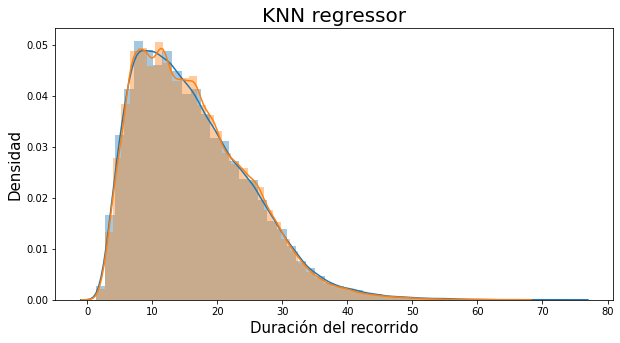

In [92]:
plt.figure(figsize=(10,5))
sns.distplot(ytest)
sns.distplot(ypred1)
plt.title("KNN regressor", size=20)
plt.xlabel("Duración del recorrido", size=15)
plt.ylabel("Densidad", size=15)

# Linear SVR (Super vector regressor)

In [93]:
regressor_svr = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5), verbose=True)

In [94]:
regressor_svr.fit(xtrain_scal, ytrain)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing linearsvr, total=  10.2s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=0, tol=1e-05))],
         verbose=True)

In [95]:
regressor_svr.score(xtest_scal, ytest)

0.924607395876417

In [96]:
ypred2 =regressor_svr.predict(xtest_scal)

In [97]:
np.sqrt(mean_squared_error(ytest, ypred2))

2.4025383520233294

Text(0, 0.5, 'Densidad')

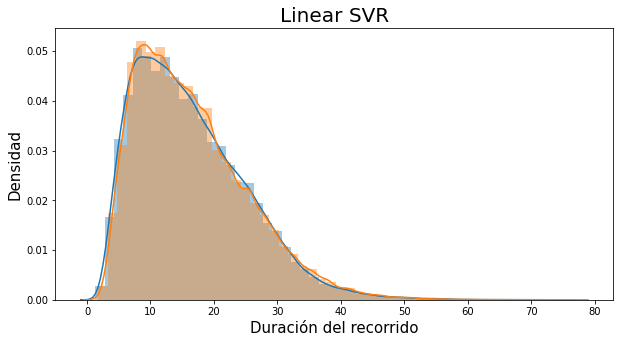

In [98]:
plt.figure(figsize=(10,5))
sns.distplot(ytest)
sns.distplot(ypred2)
plt.title("Linear SVR", size=20)
plt.xlabel("Duración del recorrido", size=15)
plt.ylabel("Densidad", size=15)